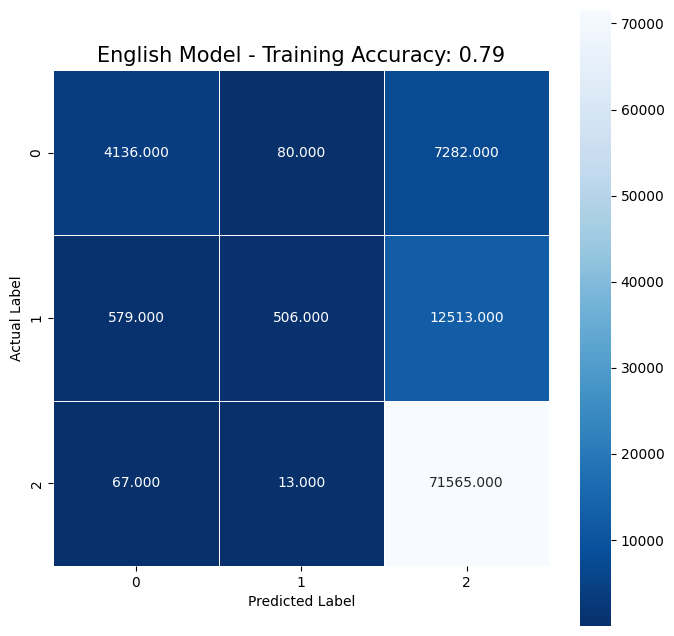

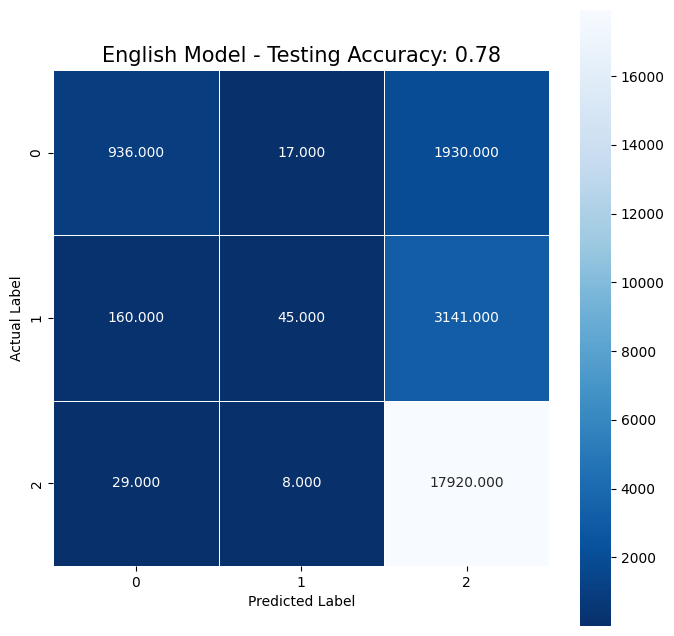

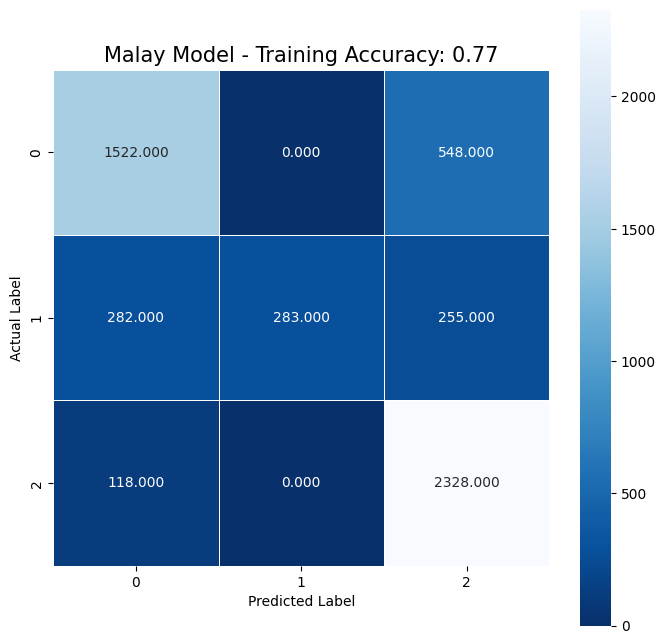

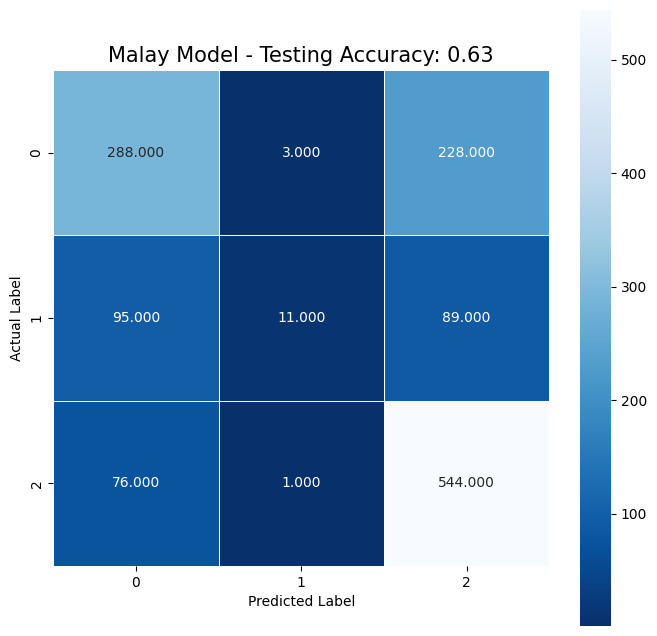

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Read datasets
english_df = pd.read_csv('englishmodel_cleaned.csv')
malay_df = pd.read_csv('MMT_donepreprocess.csv')

# Function to prepare data and train model
def train_model(data, title):
    x = data['normalized_text']
    y = data['sentiment']
    tfidf_vectorizer = TfidfVectorizer()
    x = tfidf_vectorizer.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)
    nb = MultinomialNB()
    nb.fit(x_train, y_train)

    # Predict and evaluate on training data
    y_pred_train = nb.predict(x_train)
    conf_matrix_train = confusion_matrix(y_train, y_pred_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    plot_confusion_matrix(conf_matrix_train, accuracy_train, title + " - Training")

    # Predict and evaluate on testing data
    y_pred_test = nb.predict(x_test)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    plot_confusion_matrix(conf_matrix_test, accuracy_test, title + " - Testing")

    return tfidf_vectorizer, nb

def plot_confusion_matrix(conf_matrix, accuracy, title):
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
    plt.title(f'{title} Accuracy: {accuracy:.2f}', size=15)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

# Train English and Malay models
english_vectorizer, english_model = train_model(english_df, "English Model")
malay_vectorizer, malay_model = train_model(malay_df, "Malay Model")


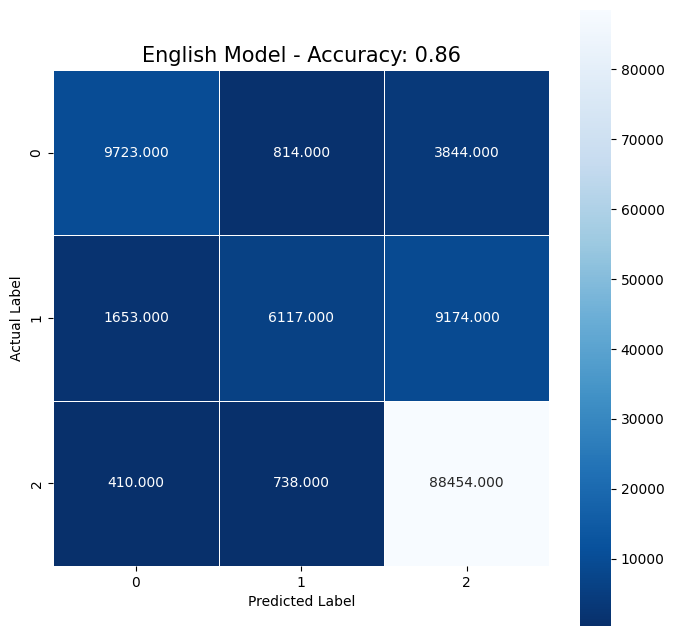

English Model Best hyperparameters: {'alpha': 0.1}
English Model Accuracy: 0.8625


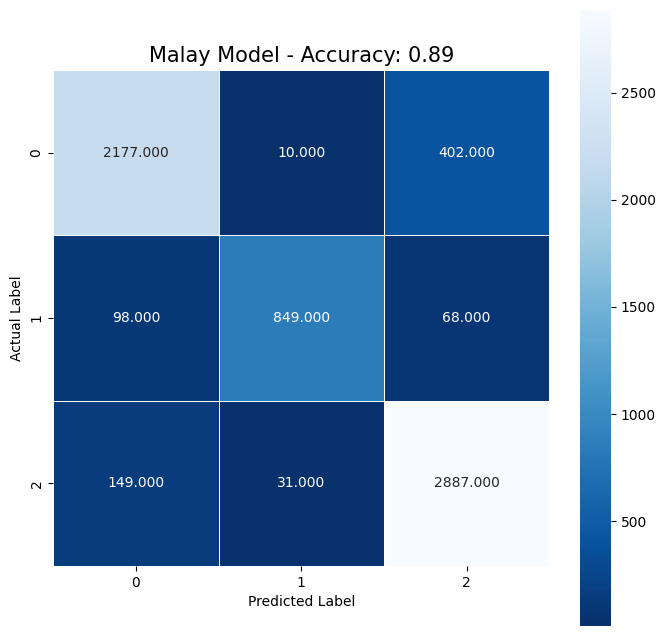

Malay Model Best hyperparameters: {'alpha': 0.1}
Malay Model Accuracy: 0.8864


In [11]:
#IMPROVE ACCURACY BY MANIPULATE THE HYPERPARAMETER
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Function to prepare data and train model with hyperparameter tuning
def train_model_with_tuning(data, title):
    x = data['normalized_text']
    y = data['sentiment']
    tfidf_vectorizer = TfidfVectorizer()
    x = tfidf_vectorizer.fit_transform(x)
    
    # Initialize KFold with the number of splits
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    
    # Define the parameter grid for alpha values
    param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}
    
    # Initialize Multinomial Naive Bayes classifier
    classifier = MultinomialNB()
    
    # Initialize GridSearchCV with the classifier, parameter grid, and cross-validation strategy
    grid_search = GridSearchCV(classifier, param_grid, cv=kfold, scoring='accuracy')
    
    # Perform GridSearchCV on the data
    grid_search.fit(x, y)
    
    # Get the best estimator from the grid search
    best_classifier = grid_search.best_estimator_
    
    # Evaluate classifier
    conf_matrix = confusion_matrix(y, best_classifier.predict(x))
    accuracy = accuracy_score(y, best_classifier.predict(x))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
    plt.title(f'{title} - Accuracy: {accuracy:.2f}', size=15)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

    # Print the best hyperparameters
    print(f"{title} Best hyperparameters:", grid_search.best_params_)
    print(f"{title} Accuracy: {accuracy:.4f}")

# Train English and Malay models with hyperparameter tuning
train_model_with_tuning(english_df, "English Model")
train_model_with_tuning(malay_df, "Malay Model")


In [37]:
import pandas as pd

# Read the new CSV file
new_data = pd.read_csv('Nikedataset_aspects_category_lang.csv')

# Separate English and Malay data
english_data = new_data[new_data['Language'] == 'en'].copy()  # Make a copy to avoid SettingWithCopyWarning
malay_data = new_data[new_data['Language'] == 'id'].copy()  # Make a copy to avoid SettingWithCopyWarning

# Prepare data for prediction
english_data['Text'] = english_data['normalized_text'].apply(lambda x: preprocess_text(x, 'en'))
malay_data['Text'] = malay_data['normalized_text'].apply(lambda x: preprocess_text(x, 'id'))

# Predict sentiments based on language
english_data['Predicted_Sentiment'] = english_model.predict(english_vectorizer.transform(english_data['Text']))
malay_data['Predicted_Sentiment'] = malay_model.predict(malay_vectorizer.transform(malay_data['Text']))

# Concatenate results and display
predicted_sentiments = pd.concat([english_data, malay_data], ignore_index=True)
print(predicted_sentiments)


                           created_at        username  \
0      Tue Feb 27 18:14:53 +0000 2024        bug4bug_   
1      Tue Feb 27 18:07:34 +0000 2024   FanaticsSucks   
2      Tue Feb 27 17:59:35 +0000 2024  DirectingBarca   
3      Tue Feb 27 17:54:48 +0000 2024   ManagingBarca   
4      Tue Feb 27 17:27:36 +0000 2024     p_to_the_j_   
...                               ...             ...   
29700  Wed Jan 25 11:33:55 +0000 2023  poyervusamayhq   
29701  Tue Jan 24 03:09:21 +0000 2023     fransxjapan   
29702  Sun Jan 22 14:43:57 +0000 2023       ultckyuns   
29703  Sun Jan 22 10:36:08 +0000 2023  BINTANGmhaptra   
29704  Thu Jan 19 18:04:47 +0000 2023    ekspektashit   

                                         normalized_text     Topic Label  \
0      walked street dogs rn nd saw guy nike shirt sa...      Durability   
1      weve reached point referring dissatisfied cust...      Durability   
2      fc barcelona say cannot close contract nike pu...      Durability   
3      fc b

In [38]:
# Count the total predicted sentiment
sentiment_counts = predicted_sentiments['Predicted_Sentiment'].value_counts()

# Display the counts
print(sentiment_counts)


Predicted_Sentiment
 1    28548
-1     1032
 0      125
Name: count, dtype: int64


In [39]:
df= pd.DataFrame(predicted_sentiments[['created_at','username','normalized_text','Topic Label','Category','Language','Predicted_Sentiment']])
df.tail()

,created_at,username,normalized_text,Topic Label,Category,Language,Predicted_Sentiment
29700,Wed Jan 25 11:33:55 +0000 2023,poyervusamayhq,best nike x baki hanma grappler manga design o...,Durability,Clothing,id,1
29701,Tue Jan 24 03:09:21 +0000 2023,fransxjapan,lihat wanita sdg cuci baju kuning favorite bel...,Comfortability,Footwear,id,1
29702,Sun Jan 22 14:43:57 +0000 2023,ultckyuns,baju ketat nike changkyun beneran siklus pake ...,Comfortability,Clothing,id,-1
29703,Sun Jan 22 10:36:08 +0000 2023,BINTANGmhaptra,baju dongker new nike panda dunk,Comfortability,Footwear,id,-1
29704,Thu Jan 19 18:04:47 +0000 2023,ekspektashit,messi rugi messi baju psg nike x jordan dituke...,Comfortability,Clothing,id,-1


In [40]:
df.to_csv('Nikedataset_aspects_category_lang_nb.csv', index=False)  